In [1]:
%reset -fs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible
sns.set(context='notebook', style='whitegrid', font_scale=1.2)
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

In [2]:
df = pd.read_csv('income_evaluation.csv', na_values=' ?')

In [3]:
df.shape

(32561, 15)

In [4]:
df.isnull().sum()

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
df.columns = [column.strip() for column in df.columns] #reformat

In [7]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [8]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) #trim space of every cell

In [9]:
df = df.drop(['capital-gain', 'capital-loss','education','fnlwgt'], axis=1)

In [10]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [11]:
# df.replace(np.NaN, 999, inplace=True) #change NaN values to ints
# df.head(50)

In [12]:
df.shape
# df.info()

(32561, 11)

In [13]:
df = df[(df['hours-per-week'] >= 40) & (df['native-country'] == 'United-States')] #filter make country US and hour-per week >=40

In [14]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K


In [15]:
df.isnull().sum()

age                 0
workclass         793
education-num       0
marital-status      0
occupation        796
relationship        0
race                0
sex                 0
hours-per-week      0
native-country      0
income              0
dtype: int64

In [16]:
# Drop Nulls 
print("prior shape: ", df.shape)
df.dropna(how='any', inplace=True)
print("post shape: ", df.shape)

prior shape:  (22174, 11)
post shape:  (21378, 11)


In [17]:
#running a loop of value_counts of each column to find out unique values. 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    676
35    675
31    659
34    650
33    641
37    641
38    637
39    635
32    621
30    612
28    610
41    607
42    595
29    595
40    595
27    594
43    593
46    564
44    564
25    553
45    548
26    544
47    534
24    497
23    474
51    468
50    464
49    450
48    402
52    358
22    355
53    337
54    302
21    299
55    295
56    270
20    267
59    252
58    251
57    247
60    214
19    190
61    181
62    138
63    117
64     96
18     86
65     71
66     52
67     50
68     42
69     33
17     27
70     25
71     22
90     22
73     15
72     14
75     10
74      8
76      6
77      6
79      5
78      4
83      3
88      3
80      2
84      1
85      1
86      1
82      1
81      1
Name: age, dtype: int64
---- workclass ---
Private             15530
Self-emp-not-inc     1727
Local-gov            1562
Self-emp-inc          873
State-gov             872
Federal-gov           808
Without-pay             6
Name: workclass, dtype: int64
---- educati

In [18]:
# df.to_csv('income_evaluation_EDA.csv')

In [19]:
df.rename(columns={'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital status', 'education-num': 'education num'}, inplace=True)

In [20]:
df.head()

,age,workclass,education num,marital status,occupation,relationship,race,sex,hours per week,country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K


In [21]:
#mapping the data into numerical data using map function
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})#.astype(int)

#gender
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})#.astype(int)

In [22]:
# create dummie variables
df = pd.get_dummies(df, dummy_na=True)
df.head()

,age,education num,sex,hours per week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_nan,marital status_Divorced,marital status_Married-AF-spouse,marital status_Married-civ-spouse,marital status_Married-spouse-absent,marital status_Never-married,marital status_Separated,marital status_Widowed,marital status_nan,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_nan,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,relationship_nan,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,race_nan,country_United-States,country_nan
0,39,13,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,38,9,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,53,7,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,37,14,1,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
7,52,9,0,45,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [23]:
df.shape

(21378, 51)

In [24]:
df = df.drop(['relationship_nan','race_nan','country_nan', 'marital status_nan','workclass_nan','occupation_nan'], axis=1) #delete column

In [25]:
df.head()

,age,education num,sex,hours per week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital status_Divorced,marital status_Married-AF-spouse,marital status_Married-civ-spouse,marital status_Married-spouse-absent,marital status_Never-married,marital status_Separated,marital status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_United-States
0,39,13,0,40,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,38,9,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,53,7,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
5,37,14,1,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
7,52,9,0,45,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


In [26]:
# df.to_csv('income_evaluation_dummies.csv')

In [27]:
df_X = df.copy()
df_X.drop(['income','country_United-States'], axis=1, inplace=True)
df_X.head()

,age,education num,sex,hours per week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital status_Divorced,marital status_Married-AF-spouse,marital status_Married-civ-spouse,marital status_Married-spouse-absent,marital status_Never-married,marital status_Separated,marital status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,13,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,38,9,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,53,7,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,37,14,1,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7,52,9,0,45,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [28]:
df_X

,age,education num,sex,hours per week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital status_Divorced,marital status_Married-AF-spouse,marital status_Married-civ-spouse,marital status_Married-spouse-absent,marital status_Never-married,marital status_Separated,marital status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,13,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,38,9,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,53,7,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,37,14,1,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7,52,9,0,45,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,14,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
32555,22,10,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
32557,40,9,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
32558,58,9,1,40,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [29]:
df_y = df.copy()
df_y = df.iloc[:, 4]
df_y.head()

0    0
2    0
3    0
5    0
7    1
Name: income, dtype: int64

In [30]:
# Train and test split, 20% for final testing
X, X_test, y, y_test = train_test_split(df_X, df_y, test_size=.2, random_state=10)
    
# Train and val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [31]:
lm1 = LogisticRegression(penalty= 'l1', C=1, max_iter=2000, solver='liblinear') 
lm1.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=2000, penalty='l1', solver='liblinear')

In [32]:
lm1.coef_

array([[ 0.03305862,  0.33294686, -0.98275403,  0.02120779,  0.39465834,
        -0.51809331, -0.14880627,  0.        , -0.59731596, -0.60231467,
         0.        , -1.55251889,  0.94433655,  0.19404612, -1.80859771,
        -1.91281454, -1.6292297 , -1.39728797, -0.22954918,  0.        ,
         0.        ,  0.75847112, -1.00227258, -0.84892619, -0.3633567 ,
        -1.19821397, -1.50222259,  0.51975313,  0.43908   ,  0.2797675 ,
         0.39014736, -0.17714367, -0.23786126,  0.        , -0.80299526,
        -1.21825595, -0.23272756,  1.28721379, -0.86102737,  0.12111029,
        -0.21834776, -0.50867555, -0.23161083]])

In [33]:
# divide by 4 rule
lm1_new = lm1.coef_ / 4
lm1_new


array([[ 0.00826465,  0.08323672, -0.24568851,  0.00530195,  0.09866458,
        -0.12952333, -0.03720157,  0.        , -0.14932899, -0.15057867,
         0.        , -0.38812972,  0.23608414,  0.04851153, -0.45214943,
        -0.47820364, -0.40730743, -0.34932199, -0.0573873 ,  0.        ,
         0.        ,  0.18961778, -0.25056814, -0.21223155, -0.09083918,
        -0.29955349, -0.37555565,  0.12993828,  0.10977   ,  0.06994187,
         0.09753684, -0.04428592, -0.05946531,  0.        , -0.20074882,
        -0.30456399, -0.05818189,  0.32180345, -0.21525684,  0.03027757,
        -0.05458694, -0.12716889, -0.05790271]])

In [34]:
a = np.squeeze(lm1_new)

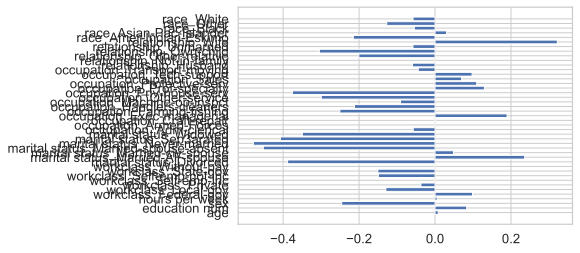

In [35]:
names = ['age', 'education num', 'sex', 'hours per week',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital status_Divorced', 'marital status_Married-AF-spouse',
       'marital status_Married-civ-spouse',
       'marital status_Married-spouse-absent', 'marital status_Never-married',
       'marital status_Sep3arated', 'marital status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White']
fig = plt.figure()
plt.barh(names, a)

plt.show()
# plt.savefig('barh coeff probability.png', dpi=300);

In [36]:
pair_plot1 = df
pair_plot1 = pair_plot1.iloc[:, [0,1,2,3,4]]

pair_plot1

,age,education num,sex,hours per week,income
0,39,13,0,40,0
2,38,9,0,40,0
3,53,7,0,40,0
5,37,14,1,40,0
7,52,9,0,45,1
...,...,...,...,...,...
32554,53,14,0,40,1
32555,22,10,0,40,0
32557,40,9,0,40,1
32558,58,9,1,40,0


In [37]:
# sns.pairplot(pair_plot1, hue='income')
# plt.savefig('pair plot1.png', dpi=300);

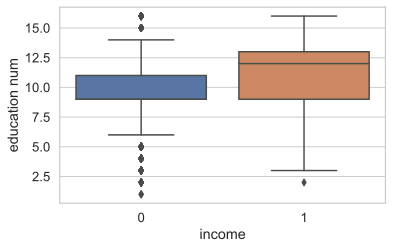

In [38]:
sns.boxplot(x='income', y='education num', data=pair_plot1)
plt.tight_layout(pad=1.8)
plt.savefig('boxplot income_education num.png', dpi=300);

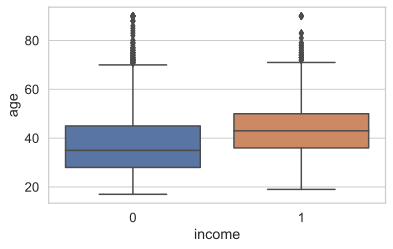

In [39]:
sns.boxplot(x='income', y='age', data=pair_plot1)
plt.tight_layout(pad=1.8)
plt.savefig('boxplot income_age.png', dpi=300);

In [40]:
# sns.boxplot(x='income', y='sex', data=pair_plot1)
# plt.savefig('boxplot income_sex.png', dpi=300);

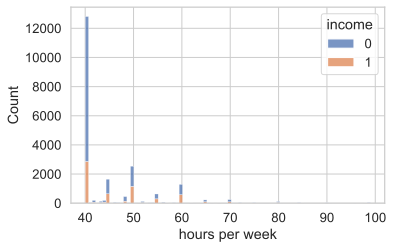

In [41]:
# sns.set_style("ticks")
sns.histplot(data=pair_plot1, x="hours per week", hue="income",multiple="stack")
plt.tight_layout(pad=1.8)
# plt.savefig('hist hours per week.png', dpi=300);

In [42]:
# pair_plot2 = train_df.copy()
# pair_plot2 = pair_plot2.iloc[:,-7:]
# pair_plot2 = pair_plot2.drop(['country_United-States'], axis=1)
# pair_plot2

In [43]:
# sns.pairplot(pair_plot2, hue='income')
# plt.savefig('pairplot2.png', dpi=300);

In [44]:
# pair_plot2.head()

In [45]:
pair_plot3 = df
pair_plot3 = pair_plot3.iloc[:,-12:]
pair_plot3 = pair_plot3.drop(['country_United-States','race_White','race_Amer-Indian-Eskimo','race_Asian-Pac-Islander','race_Black','race_Other'], axis=1)
pair_plot3

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
5,0,0,0,0,0,1
7,1,0,0,0,0,0
...,...,...,...,...,...,...
32554,1,0,0,0,0,0
32555,0,1,0,0,0,0
32557,1,0,0,0,0,0
32558,0,0,0,0,1,0


In [46]:
# sns.pairplot(pair_plot3, hue='income')
# plt.savefig('pairplot3.png', dpi=300);

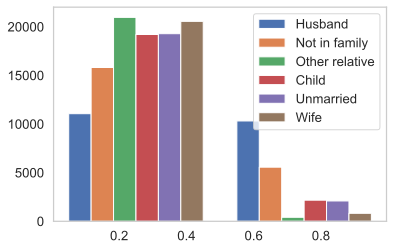

In [47]:
hist3 = pair_plot3.copy()
names2 = ['Husband','Not in family','Other relative','Child', 'Unmarried','Wife']
# hist3 = hist3.drop(['income'], axis=1)
# sns.histplot(data=hist3, bins=2);
plt.hist(hist3, bins=2)
plt.legend(names2)
plt.grid(False);
plt.tight_layout(pad=1.8)
# plt.savefig('hist income_relationship', dpi=300);

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
# standard scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val= scaler.fit_transform(X_val)
X_test= scaler.fit_transform(X_test)

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [51]:
#Optimize & define models/ hyperparameters for LogisticRegression
model = LogisticRegression(max_iter=2000)
solvers = ['liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.best_params_

# summarize
print('Mean Accuracy: %.3f' % grid_result.best_score_)
print('Config: %s' % grid_result.best_params_)


Mean Accuracy: 0.803
Config: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [52]:
# Simple LogisticRegression
lm2 = LogisticRegression(penalty= 'l1', C=1, max_iter=2000, solver='liblinear').fit(X_train, y_train) 
print('Score on train: %.3f' % \
lm2.score(X_train, y_train))

Score on train: 0.803


In [53]:
print('Score on val: %.3f' % \
lm2.score(X_val, y_val))

Score on val: 0.802


In [54]:
print('Simple Logistic Regression train F1: %.3f' % \
      (f1_score(y_train, lm2.predict(X_train)))) 
print('Simple Logistic Regression val F1: %.3f' % \
      (f1_score(y_val, lm2.predict(X_val)))) 

Simple Logistic Regression train F1: 0.649
Simple Logistic Regression val F1: 0.641


In [55]:

# import statsmodels.api as sm
# OLS_model=sm.OLS(y_train,X_train)
# result=OLS_model.fit()
# print(result.summary())

In [56]:
lm2.coef_

array([[ 0.40170617,  0.79804408, -0.43157768,  0.19762554,  0.10568006,
        -0.10061303,  0.        ,  0.02940461, -0.12531998, -0.09425071,
        -0.02988755,  0.        ,  0.09005993,  1.06484879, -0.03259386,
        -0.15195166, -0.01622725,  0.0131796 , -0.07731445, -0.06541033,
         0.        ,  0.27418935, -0.18813773, -0.16911815, -0.09400352,
        -0.2988452 , -0.22622677,  0.17598651,  0.06993255,  0.08591861,
         0.07019761, -0.04454303, -0.00384281,  0.26726233, -0.04531765,
        -0.20354966,  0.11103147,  0.29100269, -0.07086007,  0.04102363,
         0.00193298, -0.03370848,  0.        ]])

In [57]:
# divide by 4 rule
lm2_new = lm2.coef_ / 4
lm2_new

array([[ 0.10042654,  0.19951102, -0.10789442,  0.04940638,  0.02642001,
        -0.02515326,  0.        ,  0.00735115, -0.03132999, -0.02356268,
        -0.00747189,  0.        ,  0.02251498,  0.2662122 , -0.00814847,
        -0.03798792, -0.00405681,  0.0032949 , -0.01932861, -0.01635258,
         0.        ,  0.06854734, -0.04703443, -0.04227954, -0.02350088,
        -0.0747113 , -0.05655669,  0.04399663,  0.01748314,  0.02147965,
         0.0175494 , -0.01113576, -0.0009607 ,  0.06681558, -0.01132941,
        -0.05088741,  0.02775787,  0.07275067, -0.01771502,  0.01025591,
         0.00048324, -0.00842712,  0.        ]])

In [58]:
from sklearn.linear_model import LogisticRegressionCV

In [59]:
# LogisticRegressionCV
reg = LogisticRegressionCV(cv=5, random_state=42).fit(X_train, y_train)
print('Logistic RegressionCV Score train: %.3f' % \
reg.score(X_train, y_train))

Logistic RegressionCV Score train: 0.804


In [60]:
print('Logistic RegressionCV Score val: %.3f' % \
reg.score(X_val, y_val))

Logistic RegressionCV Score val: 0.801


In [61]:
print('Logistic RegressionCV train F1: %.3f' % \
      (f1_score(y_train, reg.predict(X_train)))) 
print('Logistic RegressionCV val F1: %.3f' % \
      (f1_score(y_val, reg.predict(X_val)))) 

Logistic RegressionCV train F1: 0.649
Logistic RegressionCV val F1: 0.638


In [62]:
from sklearn.linear_model import RidgeClassifier

In [63]:
# Optimize & define models/ parameters for RidgeClassifier
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize
print('Mean Accuracy: %.3f' % grid_result.best_score_)
print('Config: %s' % grid_result.best_params_)

Mean Accuracy: 0.802
Config: {'alpha': 0.1}


In [64]:
ridge = RidgeClassifier( random_state=22, alpha=0.1).fit(X_train, y_train)
print('RidgeClassifier Score train: %.3f' % \
ridge.score(X_train, y_train))


RidgeClassifier Score train: 0.803


In [65]:
print('RidgeClassifier Score val: %.3f' % \
ridge.score(X_val, y_val))

RidgeClassifier Score val: 0.800


In [66]:
print('RidgeClassifier train F1: %.3f' % \
      (f1_score(y_train, ridge.predict(X_train))))

print('RidgeClassifier val F1: %.3f' % \
      (f1_score(y_val, ridge.predict(X_val)))) 

RidgeClassifier train F1: 0.643
RidgeClassifier val F1: 0.632


In [67]:
# balance data
import imblearn.over_sampling


In [80]:
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 2, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=67) 
    
X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)


lr_os = LogisticRegression(solver='liblinear') 
lr_os.fit(X_tr_rs, y_tr_rs)

ridge_os = RidgeClassifier( random_state=22, alpha=0.1).fit(X_tr_rs, y_tr_rs)
reg_os = LogisticRegressionCV(cv=5, random_state=42).fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data F1: %.3f' % \
      (f1_score(y_tr_rs, lr_os.predict(X_tr_rs))))
print('Logistic Regression on Oversampled val Data F1:  %.3f' % \
      (f1_score(y_val, lr_os.predict(X_val)))) 
print('Logistic Regression on Oversampled val Data Acuracy:  %.3f' % \
      lr_os.score(X_val, y_val))
print('---------')
print('RidgeClassifier on Oversampled train F1: %.3f' % \
      (f1_score(y_tr_rs, ridge.predict(X_tr_rs))))
print('RidgeClassifier on Oversampled val F1: %.3f' % \
      (f1_score(y_val, ridge.predict(X_val)))) 
print('RidgeClassifier on Oversampled val Accuracy: %.3f' % \
      ridge_os.score(X_val_rs, y_val_rs))
print('---------')
print('Logistic RegressionCV on Oversampled train F1: %.3f' % \
      (f1_score(y_tr_rs, reg.predict(X_tr_rs)))) 
print('Logistic RegressionCV on Oversampled val F1: %.3f' % \
      (f1_score(y_val, reg.predict(X_val))))
print('Logistic RegressionCV on Oversampled val Accuracy: %.3f' % \
      reg_os.score(X_val_rs, y_val_rs))

Logistic Regression on Oversampled Train Data F1: 0.772
Logistic Regression on Oversampled val Data F1:  0.671
Logistic Regression on Oversampled val Data Acuracy:  0.776
---------
RidgeClassifier on Oversampled train F1: 0.683
RidgeClassifier on Oversampled val F1: 0.632
RidgeClassifier on Oversampled val Accuracy: 0.773
---------
Logistic RegressionCV on Oversampled train F1: 0.691
Logistic RegressionCV on Oversampled val F1: 0.638
Logistic RegressionCV on Oversampled val Accuracy: 0.774


In [84]:
#final model Test
print('Accuracy Score on test: %.3f' % \
lm2.score(X_test, y_test))
print('Logistic Regression Test Data F1: %.3f' % \
      (f1_score(y_test, lm2.predict(X_test))))

Accuracy Score on test: 0.796
Logistic Regression Test Data F1: 0.614
